In [1]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.isnull().sum() #check if there are missing points

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<Figure size 720x432 with 0 Axes>

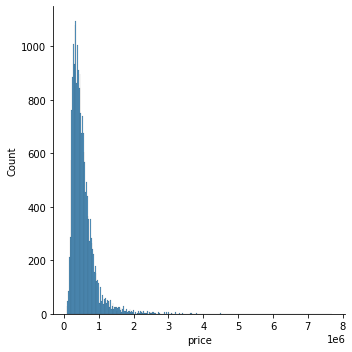

In [5]:
#feature engineering , explonatory analysis
plt.figure(figsize=(10,6))
sns.displot(df['price'])

/home/stylianos/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

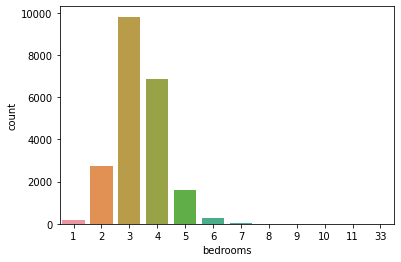

In [6]:
sns.countplot(df['bedrooms'])

In [7]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

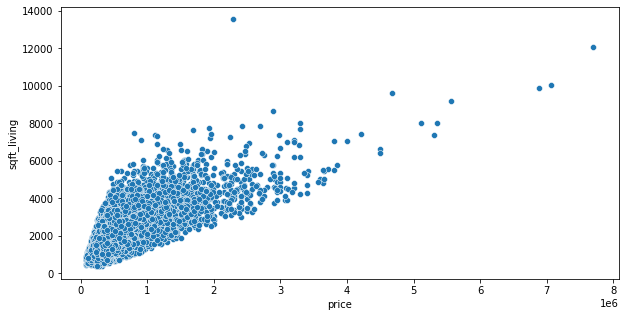

In [8]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price', y = 'sqft_living', data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

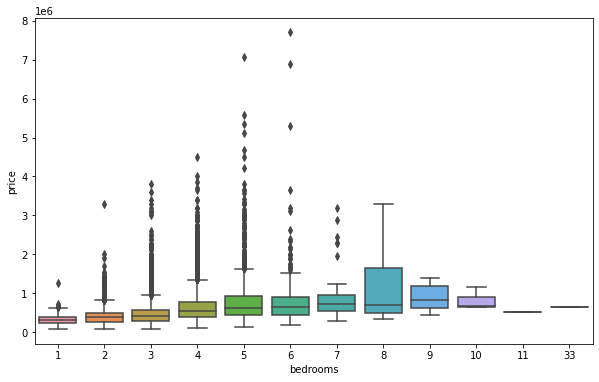

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms', y = 'price', data=df)

<AxesSubplot:xlabel='lat', ylabel='price'>

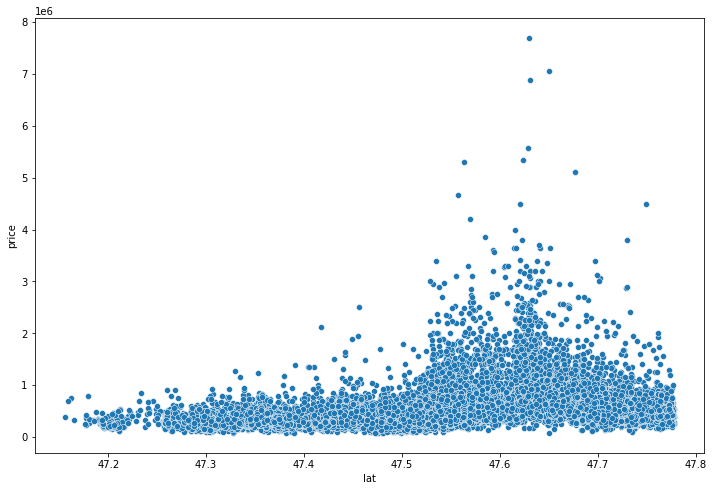

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='lat', y = 'price', data=df)

<AxesSubplot:xlabel='long', ylabel='price'>

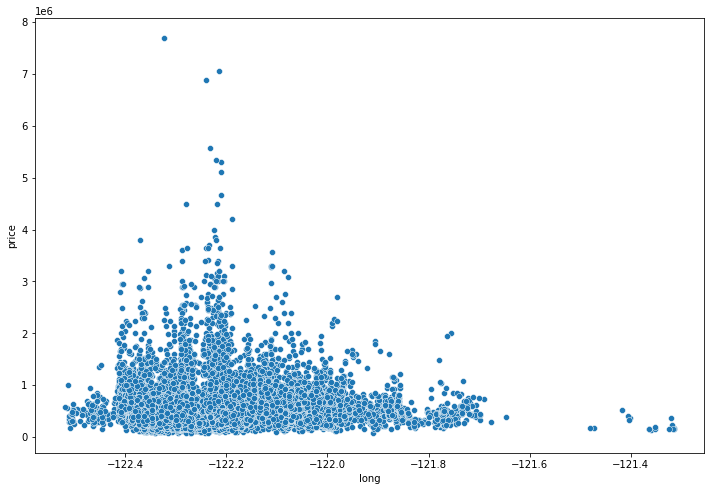

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y = 'price', data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

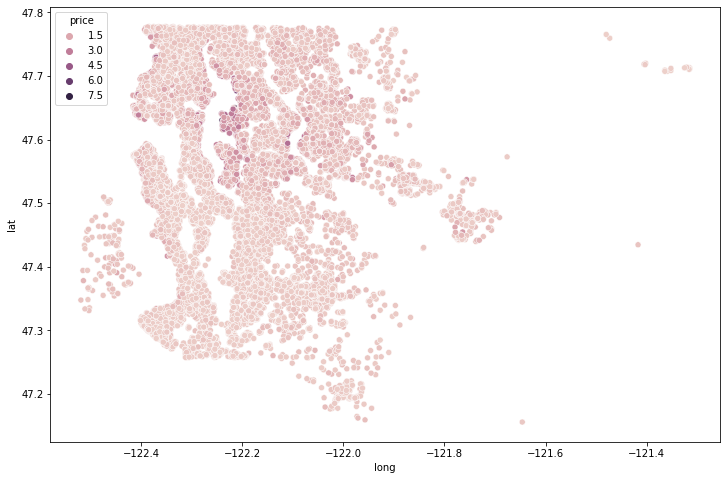

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y = 'lat', data=df, hue='price')

In [13]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [14]:
margin=(int(len(df)*0.01)+1)
margin

216

In [15]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[margin:]

<AxesSubplot:xlabel='long', ylabel='lat'>

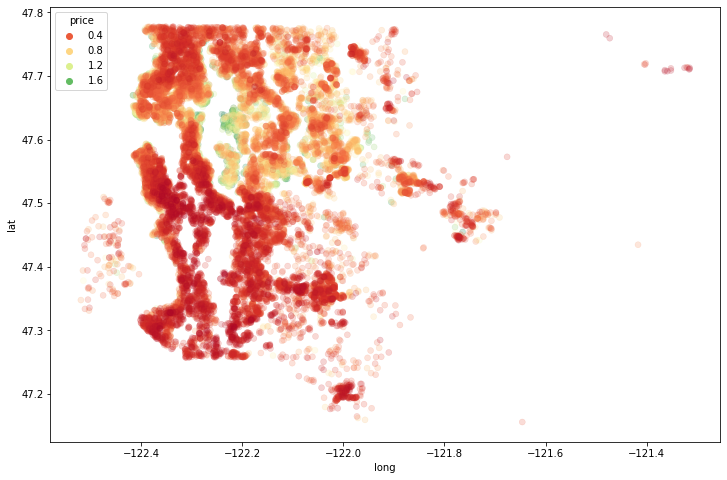

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y = 'lat', data=non_top_1_perc,edgecolor=None,alpha=0.2, palette='RdYlGn', hue='price')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

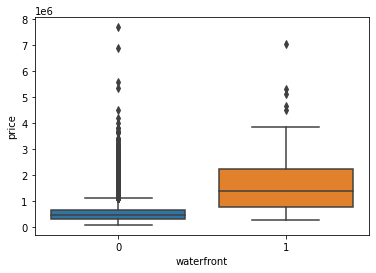

In [17]:
sns.boxplot(x='waterfront', y = 'price', data=df)

In [18]:
df = df.drop('id',axis=1)

In [19]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

<AxesSubplot:xlabel='year', ylabel='price'>

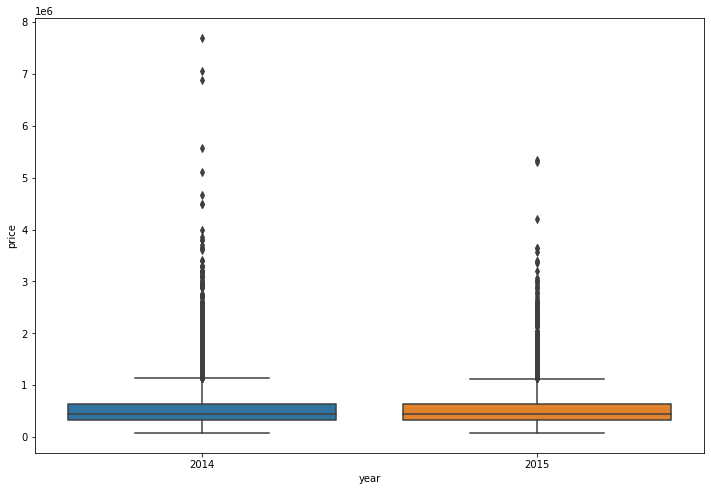

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x='year',y='price',data=df)

<AxesSubplot:xlabel='month', ylabel='price'>

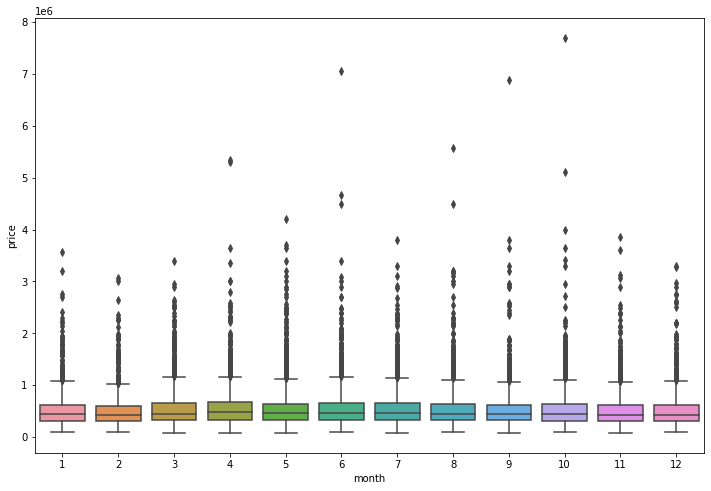

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(x='month',y='price',data=df)

<AxesSubplot:xlabel='month'>

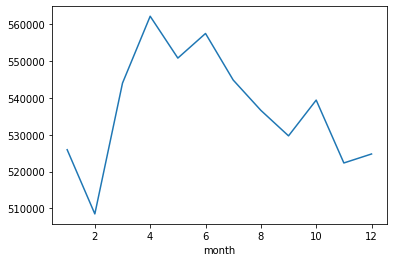

In [22]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

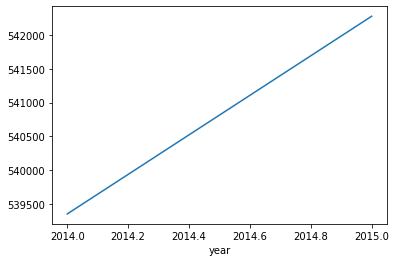

In [23]:
df.groupby('year').mean()['price'].plot()

In [24]:
df = df.drop('date',axis=1)

In [25]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [26]:
df = df.drop('zipcode',axis=1)

In [27]:
df['yr_renovated'].value_counts() #zero stands for not renovated

0       20683
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

In [28]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
65          1
1248        1
172         1
1920        1
1135        1
Name: sqft_basement, Length: 306, dtype: int64

In [29]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [32]:
from sklearn.preprocessing import MinMaxScaler

array([[4.0000e+00, 1.0000e+00, 2.2900e+03, ..., 6.3000e+03, 9.0000e+00,
        2.0140e+03],
       [3.0000e+00, 2.2500e+00, 1.6300e+03, ..., 3.1310e+03, 6.0000e+00,
        2.0140e+03],
       [4.0000e+00, 3.5000e+00, 2.8500e+03, ..., 5.7080e+03, 5.0000e+00,
        2.0150e+03],
       ...,
       [2.0000e+00, 1.7500e+00, 1.8000e+03, ..., 7.4000e+03, 4.0000e+00,
        2.0150e+03],
       [3.0000e+00, 2.0000e+00, 1.5000e+03, ..., 1.4013e+04, 4.0000e+00,
        2.0150e+03],
       [2.0000e+00, 1.0000e+00, 1.1600e+03, ..., 5.0760e+03, 1.0000e+00,
        2.0150e+03]])

In [33]:
scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [34]:
X_train.shape

(15117, 19)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [36]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [39]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
         batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 3ms/step - loss: 149313421312.0000 - val_loss: 106553778176.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 103072497664.0000 - val_loss: 96277733376.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 98953101312.0000 - val_loss: 94912159744.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 97460477952.0000 - val_loss: 93624745984.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 96031137792.0000 - val_loss: 92166881280.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 94533804032.0000 - val_loss: 90762584064.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 92976422912.0000 - val_loss: 89265799168.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 91496521728.0000 - val_loss: 87825014784.0000
Epoch 9/400
119/119 [========

119/119 [==============================] - 0s 3ms/step - loss: 38273400832.0000 - val_loss: 37179121664.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 38146416640.0000 - val_loss: 36811018240.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 37987401728.0000 - val_loss: 36660240384.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 37805998080.0000 - val_loss: 36484665344.0000
Epoch 72/400
119/119 [==============================] - 0s 3ms/step - loss: 37659987968.0000 - val_loss: 36335349760.0000
Epoch 73/400
119/119 [==============================] - 0s 3ms/step - loss: 37521821696.0000 - val_loss: 36270231552.0000
Epoch 74/400
119/119 [==============================] - 0s 3ms/step - loss: 37337788416.0000 - val_loss: 36034473984.0000
Epoch 75/400
119/119 [==============================] - 0s 2ms/step - loss: 37188521984.0000 - val_loss: 35904061440.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 3ms/step - loss: 33369516032.0000 - val_loss: 31970213888.0000
Epoch 136/400
119/119 [==============================] - 0s 3ms/step - loss: 33300140032.0000 - val_loss: 31906414592.0000
Epoch 137/400
119/119 [==============================] - 0s 3ms/step - loss: 33245478912.0000 - val_loss: 31856168960.0000
Epoch 138/400
119/119 [==============================] - 0s 3ms/step - loss: 33197481984.0000 - val_loss: 32157503488.0000
Epoch 139/400
119/119 [==============================] - 0s 3ms/step - loss: 33261793280.0000 - val_loss: 31785345024.0000
Epoch 140/400
119/119 [==============================] - 0s 3ms/step - loss: 33157122048.0000 - val_loss: 31802970112.0000
Epoch 141/400
119/119 [==============================] - 0s 3ms/step - loss: 33111975936.0000 - val_loss: 31715213312.0000
Epoch 142/400
119/119 [==============================] - 0s 3ms/step - loss: 33062809600.0000 - val_loss: 31670112256.0000
Epoch 143/400
11

119/119 [==============================] - 0s 3ms/step - loss: 31734493184.0000 - val_loss: 30052657152.0000
Epoch 202/400
119/119 [==============================] - 0s 3ms/step - loss: 31735263232.0000 - val_loss: 30040098816.0000
Epoch 203/400
119/119 [==============================] - 0s 3ms/step - loss: 31737384960.0000 - val_loss: 30074759168.0000
Epoch 204/400
119/119 [==============================] - 0s 3ms/step - loss: 31711619072.0000 - val_loss: 30005420032.0000
Epoch 205/400
119/119 [==============================] - 0s 3ms/step - loss: 31703382016.0000 - val_loss: 30025091072.0000
Epoch 206/400
119/119 [==============================] - 0s 3ms/step - loss: 31684247552.0000 - val_loss: 29983744000.0000
Epoch 207/400
119/119 [==============================] - 0s 3ms/step - loss: 31626362880.0000 - val_loss: 29991602176.0000
Epoch 208/400
119/119 [==============================] - 0s 3ms/step - loss: 31735226368.0000 - val_loss: 29954729984.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30867111936.0000 - val_loss: 29106026496.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 30890057728.0000 - val_loss: 29182705664.0000
Epoch 269/400
119/119 [==============================] - 0s 3ms/step - loss: 30838849536.0000 - val_loss: 28944908288.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 30829824000.0000 - val_loss: 28934500352.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 30802964480.0000 - val_loss: 28973916160.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 30795743232.0000 - val_loss: 28906778624.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 30801713152.0000 - val_loss: 28969900032.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 30827708416.0000 - val_loss: 28881909760.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30246983680.0000 - val_loss: 28165095424.0000
Epoch 334/400
119/119 [==============================] - 0s 2ms/step - loss: 30242344960.0000 - val_loss: 28218986496.0000
Epoch 335/400
119/119 [==============================] - 0s 2ms/step - loss: 30190544896.0000 - val_loss: 28165890048.0000
Epoch 336/400
119/119 [==============================] - 0s 2ms/step - loss: 30178584576.0000 - val_loss: 28228124672.0000
Epoch 337/400
119/119 [==============================] - 0s 2ms/step - loss: 30196199424.0000 - val_loss: 28130392064.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 30183104512.0000 - val_loss: 28114829312.0000
Epoch 339/400
119/119 [==============================] - 0s 2ms/step - loss: 30166145024.0000 - val_loss: 28112701440.0000
Epoch 340/400
119/119 [==============================] - 0s 2ms/step - loss: 30180870144.0000 - val_loss: 28122624000.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 29740961792.0000 - val_loss: 27525933056.0000
Epoch 400/400
119/119 [==============================] - 0s 3ms/step - loss: 29666789376.0000 - val_loss: 27494369280.0000


In [42]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

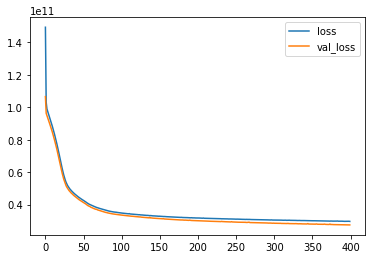

In [43]:
losses.plot()

In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [45]:
predictions = model.predict(X_test)

In [46]:
mean_absolute_error(y_test,predictions)

102001.49429253473

In [47]:
np.sqrt(mean_squared_error(y_test,predictions))

165814.25819455975

In [50]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [48]:
explained_variance_score(y_test,predictions) #how much variance is explained by our model

0.792706771490211

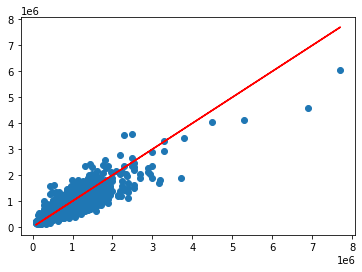

In [51]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [52]:
single_house = df.drop('price',axis=1).iloc[0]
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [53]:
model.predict(single_house)
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64